In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### READ MODEL DATA

In [2]:
path = "/Users/pastudilloe/Desktop/PNUD DATA - Products/New_DATA/"

In [3]:
years = (2017, 2018, 2019, 2020, 2021)

pred = []
dat = []


for x in years:
    p = pd.read_csv(path + ('Results/PAI_%s_Predicted.csv' %(x)), index_col=None, header=0)
    p['Anio'] = x
    pred.append(p)
    
    d = pd.read_csv(path + ('PAI_Filtrado/PAI_%s.csv' %(x)), index_col=None, header=0)
    d['Anio'] = x
    dat.append(d)

predicted_out = pd.concat(pred, axis=0, ignore_index=True)

data = pd.concat(dat, axis=0, ignore_index=True)
data.columns = ['Entidad', 'Proyecto', 'Fuente', 'Codificado', 'Devengado', 'Periodo', 'Anio']
data = data.drop('Periodo', axis=1)


In [4]:
data = data.dropna()

data['cod_ENT'] = data.Entidad.astype(str).str[:3]
data['cod_PROY'] = data.Proyecto.astype(str).str[:3]
data['cod_FUENT'] = data.Fuente.astype(str).str[:3]

data['Entidad'] = data['Entidad'].str.replace('\d+', '')
data['Entidad'] = data['Entidad'].str.replace('-', '')

data['Proyecto'] = data['Proyecto'].str.replace('\d+', '')
data['Proyecto'] = data['Proyecto'].str.replace('-', '')

data['Fuente'] = data['Fuente'].str.replace('\d+', '')
data['Fuente'] = data['Fuente'].str.replace('-', '')

data['unique_code'] = data['cod_ENT'] + "-" + data['cod_PROY'] + "-" + data['cod_FUENT']
data_1 = data[['unique_code', 'Entidad', 'Proyecto', 'Fuente', 'Codificado', 'Devengado', 'Anio']]

/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_42563/2732467477.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Entidad'] = data['Entidad'].str.replace('\d+', '')
/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_42563/2732467477.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Proyecto'] = data['Proyecto'].str.replace('\d+', '')
/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_42563/2732467477.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Fuente'] = data['Fuente'].str.replace('\d+', '')


In [5]:
data_1

,unique_code,Entidad,Proyecto,Fuente,Codificado,Devengado,Anio
0,001-001-001,ASAMBLEA NACIONAL,DISENO Y CONSTRUCCION DEL COMPLEJO LEGISLAT...,Recursos Fiscales,3.467844e+07,8.649152e+06,2017
1,001-001-998,ASAMBLEA NACIONAL,DISENO Y CONSTRUCCION DEL COMPLEJO LEGISLAT...,ANTICIPOS DE EJERCICIOS ANTERIORES,8.390278e+06,5.580667e+06,2017
2,010-001-001,CONSEJO DE LA JUDICATURA,CREACION Y MEJORAMIENTO DE LA INFRAESTRUCTU...,Recursos Fiscales,1.174847e+07,5.555507e+06,2017
3,010-003-001,CONSEJO DE LA JUDICATURA,IMPULSAR LA MEJORA PERMANENTE Y MODERNIZACI...,Recursos Fiscales,3.080750e+08,1.211313e+08,2017
4,010-003-998,CONSEJO DE LA JUDICATURA,IMPULSAR LA MEJORA PERMANENTE Y MODERNIZACI...,ANTICIPOS DE EJERCICIOS ANTERIORES,1.194670e+08,6.352570e+07,2017
...,...,...,...,...,...,...,...
9711,643-004-202,DEFENSORIA DEL PUEBLO,SISTEMA INTEGRAL DE PREVENCION PROTECCION ...,Prestamos Externos,1.009826e+06,0.000000e+00,2021
9712,643-004-998,DEFENSORIA DEL PUEBLO,SISTEMA INTEGRAL DE PREVENCION PROTECCION ...,ANTICIPOS DE EJERCICIOS ANTERIORES,5.796197e+04,0.000000e+00,2021
9713,643-005-202,DEFENSORIA DEL PUEBLO,PROGRAMA DE REFORMA INSTITUCIONAL DE LA GES...,Prestamos Externos,4.163925e+05,3.697825e+05,2021
9714,643-005-301,DEFENSORIA DEL PUEBLO,PROGRAMA DE REFORMA INSTITUCIONAL DE LA GES...,Colocaciones Internas,0.000000e+00,0.000000e+00,2021


In [6]:
#data_x = data_1
#entidad = data_1.groupby(['Entidad']).agg({'Anio':'nunique'}).reset_index()
#entidad.to_csv('/Users/pastudilloe/Desktop/PNUD DATA - Products/TEST.csv')  

In [7]:
predicted_out1 = predicted_out[['unique_code', 'BestOpt_Label', 'BestOpt_value']]
predicted_out1 = predicted_out1[predicted_out1.BestOpt_value >= 0.40]
predicted_out1.shape

(1857, 3)

In [8]:
data_2 = pd.merge(data_1, predicted_out1, how='left', on='unique_code')

data_2 = data_2[data_2["Entidad"].str.contains("DEUDA PUBLICA") == False]
data_2 = data_2[data_2["Entidad"].str.contains("INGRESOS Y TRANSFERENCIAS") == False]

data_2['Entidad'] = data_2['Entidad'].str.replace('MINISTERIO DE', '')
data_2['Entidad'] = data_2['Entidad'].str.replace('SECRETARIA TECNICA DE LA', '')
data_2['Entidad'] = data_2['Entidad'].str.replace('SECRETARIA DE LA', '')
data_2['Entidad'] = data_2['Entidad'].str.replace('SECRETARIA DE', '')
data_2['Entidad'] = data_2['Entidad'].str.replace('SERVICIO NACIONAL DE ATENCION INTEGRAL A ', '')
data_2['Entidad'] = data_2['Entidad'].str.replace('A ADOLESCENTES', '')

In [9]:
data_2

,unique_code,Entidad,Proyecto,Fuente,Codificado,Devengado,Anio,BestOpt_Label,BestOpt_value
0,001-001-001,ASAMBLEA NACIONAL,DISENO Y CONSTRUCCION DEL COMPLEJO LEGISLAT...,Recursos Fiscales,3.467844e+07,8.649152e+06,2017,NaN,NaN
1,001-001-998,ASAMBLEA NACIONAL,DISENO Y CONSTRUCCION DEL COMPLEJO LEGISLAT...,ANTICIPOS DE EJERCICIOS ANTERIORES,8.390278e+06,5.580667e+06,2017,NaN,NaN
2,010-001-001,CONSEJO DE LA JUDICATURA,CREACION Y MEJORAMIENTO DE LA INFRAESTRUCTU...,Recursos Fiscales,1.174847e+07,5.555507e+06,2017,16.6 Crear a todos los niveles instituciones e...,0.976477
3,010-001-001,CONSEJO DE LA JUDICATURA,CREACION Y MEJORAMIENTO DE LA INFRAESTRUCTU...,Recursos Fiscales,1.174847e+07,5.555507e+06,2017,16.6 Crear a todos los niveles instituciones e...,0.985718
4,010-003-001,CONSEJO DE LA JUDICATURA,IMPULSAR LA MEJORA PERMANENTE Y MODERNIZACI...,Recursos Fiscales,3.080750e+08,1.211313e+08,2017,16.6 Crear a todos los niveles instituciones e...,0.504152
...,...,...,...,...,...,...,...,...,...
13981,643-004-202,DEFENSORIA DEL PUEBLO,SISTEMA INTEGRAL DE PREVENCION PROTECCION ...,Prestamos Externos,1.009826e+06,0.000000e+00,2021,17 Alianzas para lograr los objetivos,0.954302
13982,643-004-998,DEFENSORIA DEL PUEBLO,SISTEMA INTEGRAL DE PREVENCION PROTECCION ...,ANTICIPOS DE EJERCICIOS ANTERIORES,5.796197e+04,0.000000e+00,2021,NaN,NaN
13983,643-005-202,DEFENSORIA DEL PUEBLO,PROGRAMA DE REFORMA INSTITUCIONAL DE LA GES...,Prestamos Externos,4.163925e+05,3.697825e+05,2021,NaN,NaN
13984,643-005-301,DEFENSORIA DEL PUEBLO,PROGRAMA DE REFORMA INSTITUCIONAL DE LA GES...,Colocaciones Internas,0.000000e+00,0.000000e+00,2021,NaN,NaN


# GENERAL Unique Projects

In [10]:
data_2a = data_2.groupby(['Entidad', 'Anio']).agg({'Codificado':'sum', 'Devengado':'sum'}).reset_index()

data_2a['codif - deveng'] = data_2a['Codificado'] - data_2a['Devengado']
data_2a['% ejecutado'] = (data_2a['Devengado'] * 100 /  data_2a['Codificado']).round(2)

In [11]:
data_2a = data_2a.sort_values(by='Codificado', ascending = False)
data_2a['Codificado'] = (data_2a['Codificado']).round(1)
data_2a['Devengado'] = (data_2a['Devengado']).round(1)

In [12]:
data_2a = data_2a.sort_values(by = ['Codificado', 'Entidad', 'Anio'], ascending = False)

data_2a['T_Cod'] = data_2a.groupby(['Entidad'])['Codificado'].transform('sum')
data_2a = data_2a.sort_values(by='T_Cod', ascending = False)

data_2a_top = data_2a.head(47)
data_2a_top = data_2a_top[['Entidad', 'Anio', 'Codificado', 'Devengado']]
data_2a_top = data_2a_top.pivot_table(values='Codificado', index='Anio', columns='Entidad')



In [13]:
data_2a_top.columns = ['AGRICULTURA', 'DEFENSA', 'VIVIENDA', 'EDUCACION', 'ELECTRICIDAD', 'INCLUSION', 'PRODUCCION', 'SALUD', 'OBRAS', 'CONTRATACION']
data_2a_top

,AGRICULTURA,DEFENSA,VIVIENDA,EDUCACION,ELECTRICIDAD,INCLUSION,PRODUCCION,SALUD,OBRAS,CONTRATACION
Anio,,,,,,,,,,
2017,1.012246e+10,2.653453e+09,4.751925e+09,3.074913e+10,2.047669e+10,4.046340e+09,1.186228e+07,2.391019e+10,1.414067e+10,1.323926e+10
2018,8.468211e+09,NaN,2.090569e+09,2.810209e+10,2.435363e+10,4.330845e+09,3.239596e+08,2.546764e+10,8.734182e+09,5.194252e+09
2019,2.143357e+09,NaN,4.541052e+09,9.543632e+09,2.793539e+09,1.714545e+09,1.233516e+08,7.879853e+09,5.487124e+09,2.549043e+09
2020,1.848236e+09,1.476833e+09,8.907050e+09,1.081066e+10,2.828084e+09,3.692014e+09,7.028628e+09,8.586128e+09,4.492073e+09,7.666506e+08
2021,2.172007e+09,NaN,2.654391e+09,9.925850e+09,2.010050e+09,8.208388e+09,1.100737e+10,1.245447e+10,5.436913e+09,2.296184e+07


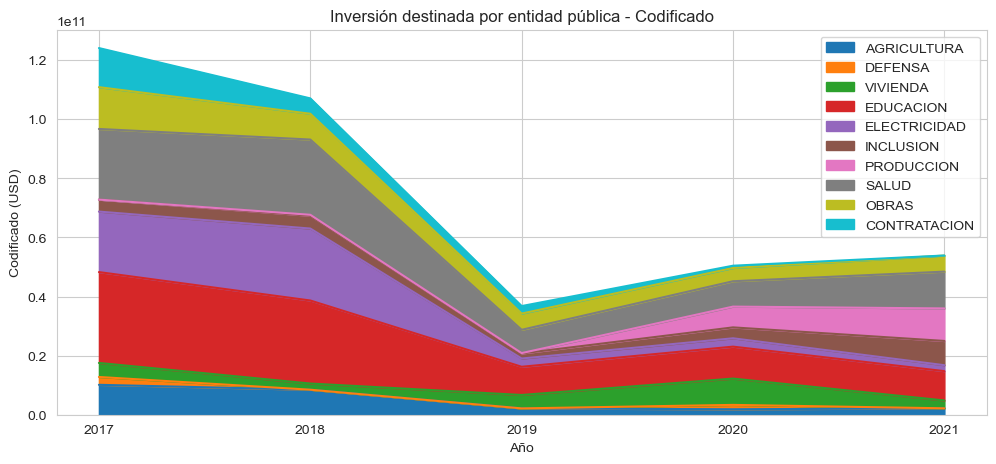

In [14]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_2a_top.plot(kind='area', stacked=True)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Inversión destinada por entidad pública - Codificado')

plt.xlabel('Año')
plt.ylabel('Codificado (USD)')

plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [15]:
data_2a = data_2a.sort_values(by = ['Devengado', 'Entidad', 'Anio'], ascending = False)

data_2a['T_Cod'] = data_2a.groupby(['Entidad'])['Devengado'].transform('sum')
data_2a = data_2a.sort_values(by='T_Cod', ascending = False)

data_2a_top = data_2a.head(51)
data_2a_top = data_2a_top[['Entidad', 'Anio', 'Codificado', 'Devengado']]
data_2a_top = data_2a_top.pivot_table(values='Devengado', index='Anio', columns='Entidad')

In [16]:
data_2a_top.columns = ['AGRICULTURA', 'DEFENSA', 'VIVIENDA', 'EDUCACION', 'ENERGIA', 'INCLUSION', 'PRODUCCION', 'SALUD', 'TRANSPORT', 'TALENTO', 'CONTRATACION']
data_2a_top

,AGRICULTURA,DEFENSA,VIVIENDA,EDUCACION,ENERGIA,INCLUSION,PRODUCCION,SALUD,TRANSPORT,TALENTO,CONTRATACION
Anio,,,,,,,,,,,
2017,5.709963e+09,NaN,2.246786e+09,1.530170e+10,8.059075e+09,1.804054e+09,4.399122e+06,8.348978e+09,5.721528e+09,1.907160e+09,3.515388e+09
2018,3.033947e+09,NaN,5.796765e+08,1.888916e+10,4.233349e+09,1.946453e+09,7.171624e+06,3.807782e+09,2.134138e+09,1.955691e+09,1.088658e+09
2019,6.749092e+08,NaN,8.679878e+08,1.964787e+09,9.499315e+08,6.499428e+08,2.038886e+07,9.852685e+08,1.161804e+09,8.480838e+08,5.102033e+08
2020,5.001185e+08,NaN,5.327913e+09,3.569603e+09,2.488674e+08,1.602722e+09,3.545390e+09,1.243052e+09,8.071113e+08,2.762384e+08,1.235048e+08
2021,5.802300e+08,550682573.4,1.467136e+08,4.274996e+09,2.692023e+08,4.490263e+09,2.718363e+08,6.457973e+09,1.916515e+09,0.000000e+00,0.000000e+00


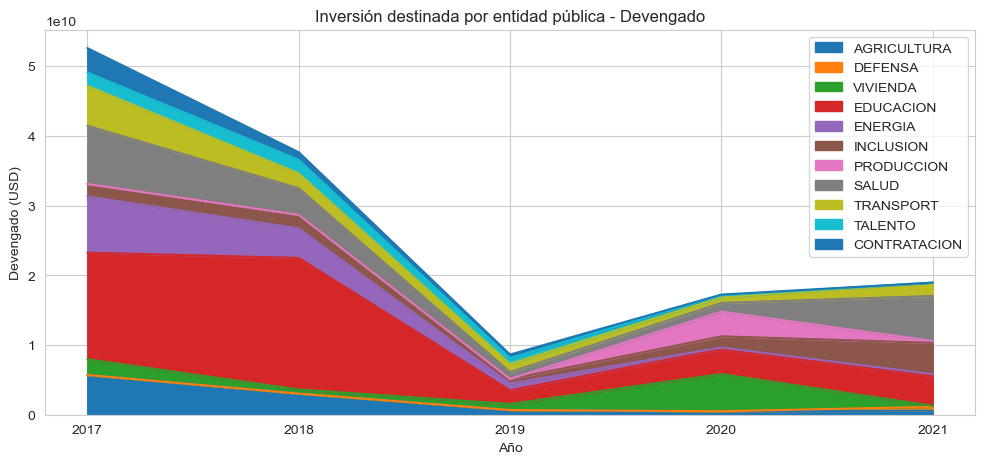

In [17]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_2a_top.plot(kind='area', stacked=True)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Inversión destinada por entidad pública - Devengado')
plt.xlabel('Año')
plt.ylabel('Devengado (USD)')

plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


# Just ODS

In [18]:
data_4 = data_2

data_4[['BestOpt_Label']] = data_4[['BestOpt_Label']].fillna('N/A')
data_4['Meta'] = data_4['BestOpt_Label'].str.split(' ').str[0]
data_4['Obj'] = data_4['Meta'].str.split('.').str[0]

data_4['ODS'] = np.where(data_4['Obj']== 'N/A', 'No ODS', 'ODS')

In [19]:
data_4a = data_4.groupby(['ODS', 'Anio']).agg({'Codificado':'sum', 'Devengado':'sum'}).reset_index()
data_4a_COD = data_4a.pivot_table(values='Codificado', index='Anio', columns='ODS')
data_4a_DEV = data_4a.pivot_table(values='Devengado', index='Anio', columns='ODS')


In [20]:
data_4a_DEV

ODS,No ODS,ODS
Anio,,
2017,1.315649e+10,4.585599e+10
2018,4.955295e+09,3.716180e+10
2019,5.960702e+09,5.502755e+09
2020,1.010518e+10,8.925976e+09
2021,8.994060e+09,1.264130e+10


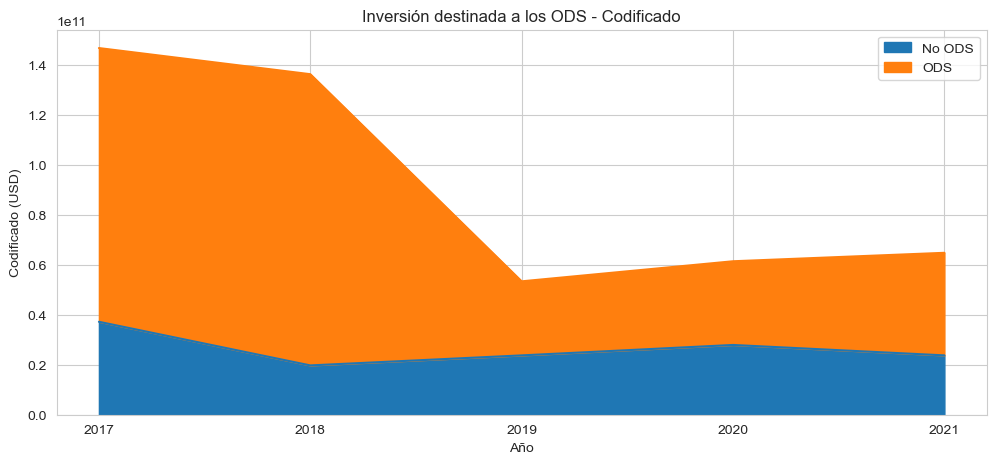

In [21]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4a_COD.plot(kind='area', stacked=True)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Inversión destinada a los ODS - Codificado')
plt.xlabel('Año')
plt.ylabel('Codificado (USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


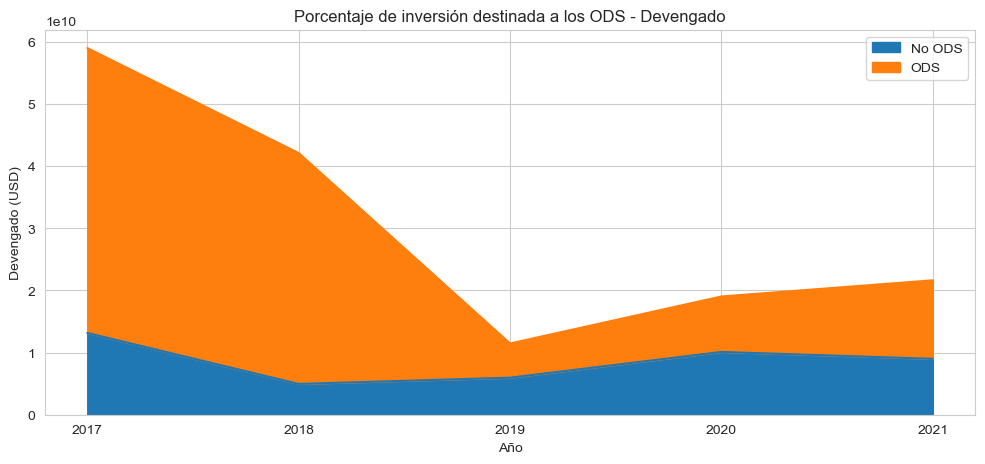

In [22]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4a_DEV.plot(kind='area', stacked=True)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Porcentaje de inversión destinada a los ODS - Devengado')
plt.xlabel('Año')
plt.ylabel('Devengado (USD)')

plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [23]:
data_4b = data_4.groupby(['Obj', 'Meta', 'BestOpt_Label', 'Anio']).agg({'Codificado':'sum', 'Devengado':'sum', 'unique_code':'count'}).reset_index()
data_4b = data_4b.loc[data_4b['BestOpt_Label'] != 'N/A']

data_4b_ = data_4b.groupby(['Obj', 'Anio']).agg({'Codificado':'sum', 'Devengado':'sum', 'unique_code':'sum'}).reset_index()

data_4b_['percent_cod'] = ((data_4b_['Codificado'] / data_4b_['Codificado'].sum()) * 100).round(2)
data_4b_['percent_dev'] = ((data_4b_['Devengado'] / data_4b_['Devengado'].sum()) * 100).round(2)
data_4b_['percent_proy'] = ((data_4b_['unique_code'] / data_4b_['unique_code'].sum()) * 100).round(2)

data_4b_ = data_4b_.sort_values(by="percent_cod", ascending = False)

In [24]:

ODS_names = {
    'Obj' : ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"],
    'name' : ["Fin a la pobreza", 
    "Hambre cero",
    "Salud y bienestar",
    "Educación de calidad",
    "Igualdad de género",
    "Agua limpia y saneamiento",
    "Energía asequible y no contaminante", 
    "Trabajo decente y crecimiento económico", 
    "Industria, innovación e infraestructura", 
    "Reducción de las desigualdades", 
    "Ciudades y comunidades sostenibles", 
    "Producción y consumo sostenibles", 
    "Acción por el clima", 
    "Vida submarina", 
    "Vida de ecosistemas terrestres",
    "Paz, justicia e instituciones sólidas",
    "Alianzas para lograr los objetivos"]}
  
# creating a Dataframe object 
ODS_names = pd.DataFrame(ODS_names)

In [25]:
data_4b_ = pd.merge(data_4b_, ODS_names, how='left', on='Obj')
data_4b_['Obj'] = data_4b_['Obj'].astype('int')
data_4b_ = data_4b_.sort_values(by='Obj')

In [26]:
data_4b_.head()

,Obj,Anio,Codificado,Devengado,unique_code,percent_cod,percent_dev,percent_proy,name
3,1,2018,1.233303e+10,2.151741e+09,162,3.73,1.95,2.18,Fin a la pobreza
9,1,2017,8.954116e+09,3.330154e+09,170,2.71,3.02,2.29,Fin a la pobreza
21,1,2021,5.652218e+09,1.872693e+09,96,1.71,1.70,1.29,Fin a la pobreza
17,1,2020,6.377117e+09,5.834711e+08,116,1.93,0.53,1.56,Fin a la pobreza
16,1,2019,6.553071e+09,8.867698e+08,191,1.98,0.81,2.57,Fin a la pobreza


In [27]:
data_4b_COD = data_4b_.pivot_table(values='Codificado', index='Anio', columns='name').reset_index()
data_4b_DEV = data_4b_.pivot_table(values='Devengado', index='Anio', columns='name').reset_index()


In [28]:
data_4b_DEV

name,Anio,Acción por el clima,Agua limpia y saneamiento,Alianzas para lograr los objetivos,Ciudades y comunidades sostenibles,Educación de calidad,Energía asequible y no contaminante,Fin a la pobreza,Hambre cero,Igualdad de género,"Industria, innovación e infraestructura","Paz, justicia e instituciones sólidas",Reducción de las desigualdades,Salud y bienestar,Trabajo decente y crecimiento económico,Vida de ecosistemas terrestres,Vida submarina
0,2017,2.855474e+07,7138615.73,2.593224e+09,2.624671e+09,1.659078e+10,2.347819e+09,3.330154e+09,5.248320e+09,5.119312e+08,3.275601e+09,4.345506e+09,3.928561e+09,6.133925e+08,85787854.82,3.245477e+08,0.000000e+00
1,2018,1.617776e+08,1843017.43,2.987774e+09,6.647265e+08,1.409984e+10,9.646553e+08,2.151741e+09,2.790234e+09,4.740827e+08,3.999250e+09,2.151933e+09,5.695255e+09,6.585301e+08,85502799.04,2.746592e+08,NaN
2,2019,2.016436e+06,86944461.70,1.366162e+08,1.642888e+08,1.414969e+09,1.180411e+08,8.867698e+08,4.304858e+08,8.531045e+08,6.653665e+08,2.616342e+08,5.512774e+07,2.662402e+08,3136096.03,1.513728e+08,6.642048e+06
3,2020,5.965228e+06,87833995.70,1.901076e+09,1.091366e+08,1.836357e+09,9.596776e+06,5.834711e+08,3.715301e+08,8.333746e+08,1.398713e+09,1.030763e+08,3.152713e+08,1.089758e+08,3167960.19,5.232022e+07,1.206110e+09
4,2021,7.808889e+04,86714974.30,2.937163e+09,6.054454e+08,1.692090e+09,1.195084e+07,1.872693e+09,1.443445e+09,2.326709e+09,8.946106e+08,3.190343e+08,2.025712e+08,9.398254e+07,1756879.78,4.172450e+07,1.113309e+08


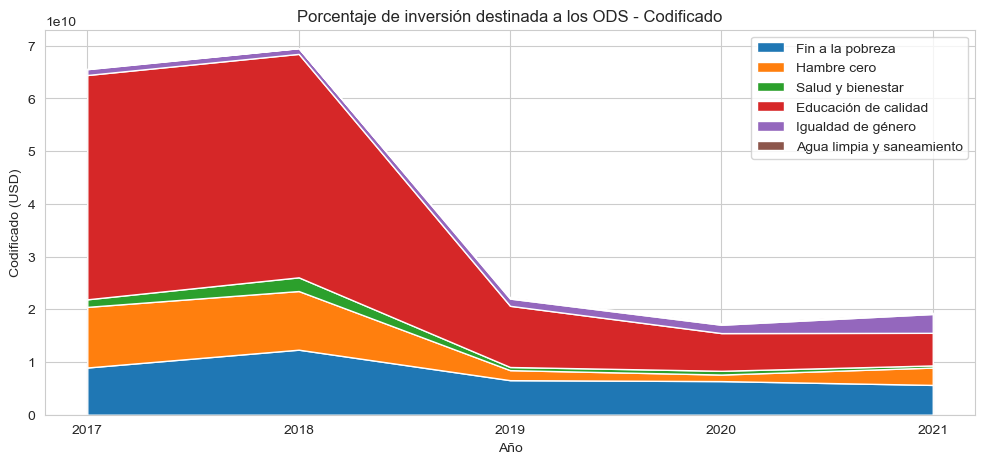

In [29]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = plt.stackplot(data_4b_COD.Anio, data_4b_COD['Fin a la pobreza'], data_4b_COD['Hambre cero'], data_4b_COD['Salud y bienestar'], 
                   data_4b_COD['Educación de calidad'], data_4b_COD['Igualdad de género'], data_4b_COD['Agua limpia y saneamiento'], labels=["Fin a la pobreza", "Hambre cero", "Salud y bienestar",
                    "Educación de calidad", "Igualdad de género", "Agua limpia y saneamiento"])

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Porcentaje de inversión destinada a los ODS - Codificado')
plt.xlabel('Año')
plt.ylabel('Codificado (USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


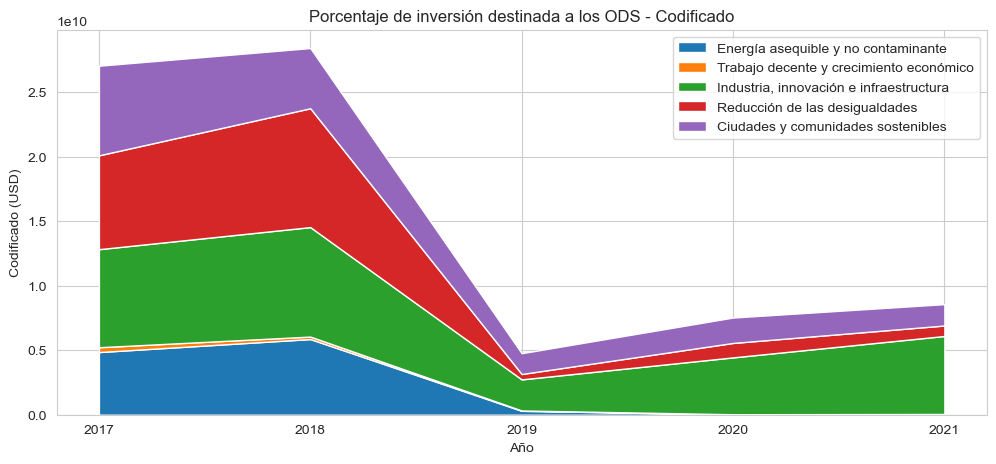

In [30]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = plt.stackplot(data_4b_COD.Anio, 
                   data_4b_COD['Energía asequible y no contaminante'], data_4b_COD['Trabajo decente y crecimiento económico'],
                   data_4b_COD['Industria, innovación e infraestructura'],data_4b_COD['Reducción de las desigualdades'],
                   data_4b_COD['Ciudades y comunidades sostenibles'], labels=["Energía asequible y no contaminante", 
                    "Trabajo decente y crecimiento económico",  "Industria, innovación e infraestructura",  "Reducción de las desigualdades", 
                    "Ciudades y comunidades sostenibles"])

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Porcentaje de inversión destinada a los ODS - Codificado')
plt.xlabel('Año')
plt.ylabel('Codificado (USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


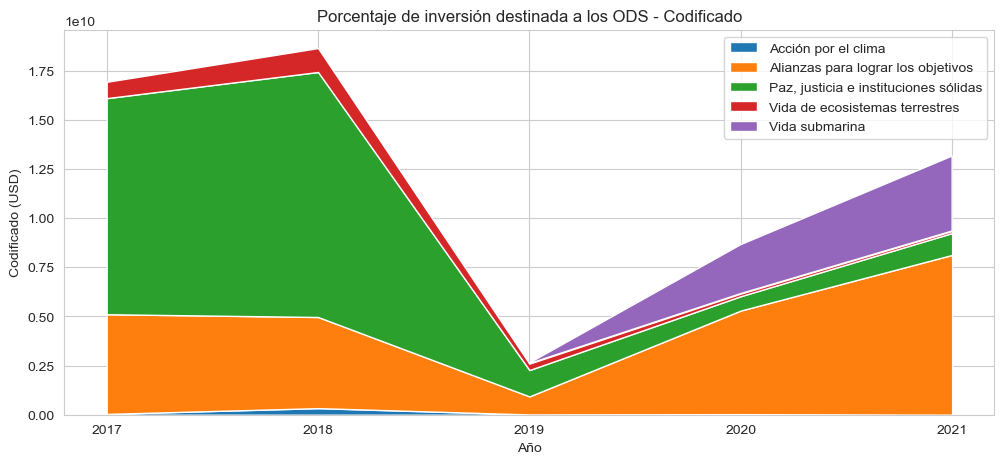

In [31]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = plt.stackplot(data_4b_COD.Anio, data_4b_COD['Acción por el clima'], data_4b_COD['Alianzas para lograr los objetivos'], data_4b_COD['Paz, justicia e instituciones sólidas'], 
                   data_4b_COD['Vida de ecosistemas terrestres'], data_4b_COD['Vida submarina'],
                   labels=["Acción por el clima", "Alianzas para lograr los objetivos", "Paz, justicia e instituciones sólidas", 
                    "Vida de ecosistemas terrestres", "Vida submarina"])

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Porcentaje de inversión destinada a los ODS - Codificado')
plt.xlabel('Año')
plt.ylabel('Codificado (USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


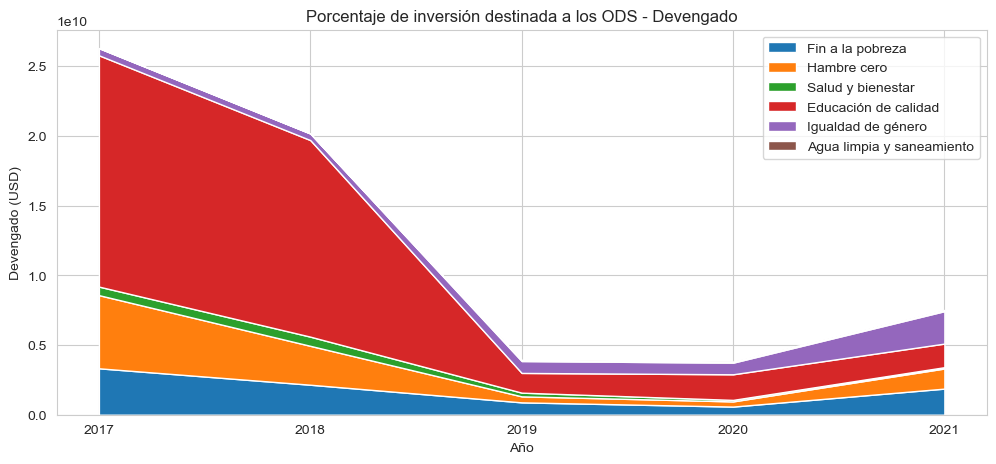

In [32]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = plt.stackplot(data_4b_DEV.Anio, data_4b_DEV['Fin a la pobreza'], data_4b_DEV['Hambre cero'], data_4b_DEV['Salud y bienestar'], 
                   data_4b_DEV['Educación de calidad'], data_4b_DEV['Igualdad de género'], data_4b_DEV['Agua limpia y saneamiento'], labels=["Fin a la pobreza", "Hambre cero", "Salud y bienestar",
                    "Educación de calidad", "Igualdad de género", "Agua limpia y saneamiento"])

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Porcentaje de inversión destinada a los ODS - Devengado')
plt.xlabel('Año')
plt.ylabel('Devengado (USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


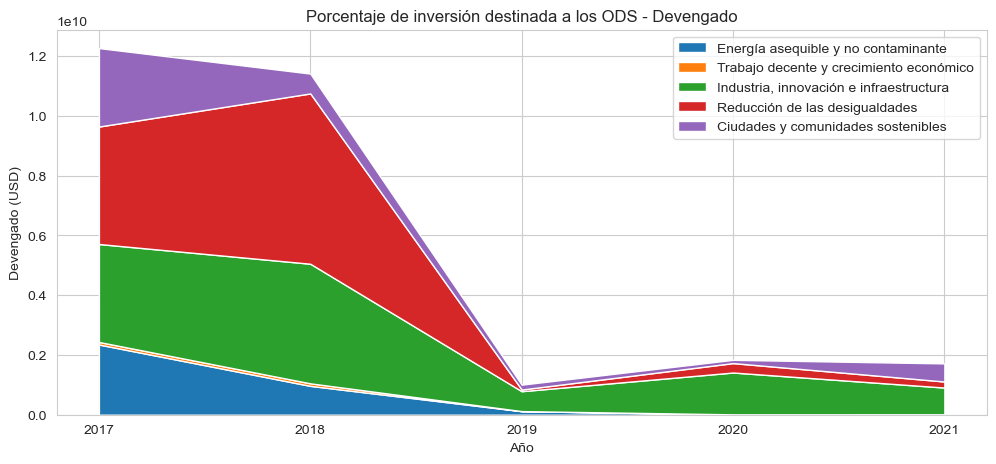

In [33]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = plt.stackplot(data_4b_DEV.Anio, 
                   data_4b_DEV['Energía asequible y no contaminante'], data_4b_DEV['Trabajo decente y crecimiento económico'],
                   data_4b_DEV['Industria, innovación e infraestructura'],data_4b_DEV['Reducción de las desigualdades'],
                   data_4b_DEV['Ciudades y comunidades sostenibles'], labels=["Energía asequible y no contaminante", 
                    "Trabajo decente y crecimiento económico",  "Industria, innovación e infraestructura",  "Reducción de las desigualdades", 
                    "Ciudades y comunidades sostenibles"])

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Porcentaje de inversión destinada a los ODS - Devengado')
plt.xlabel('Año')
plt.ylabel('Devengado (USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


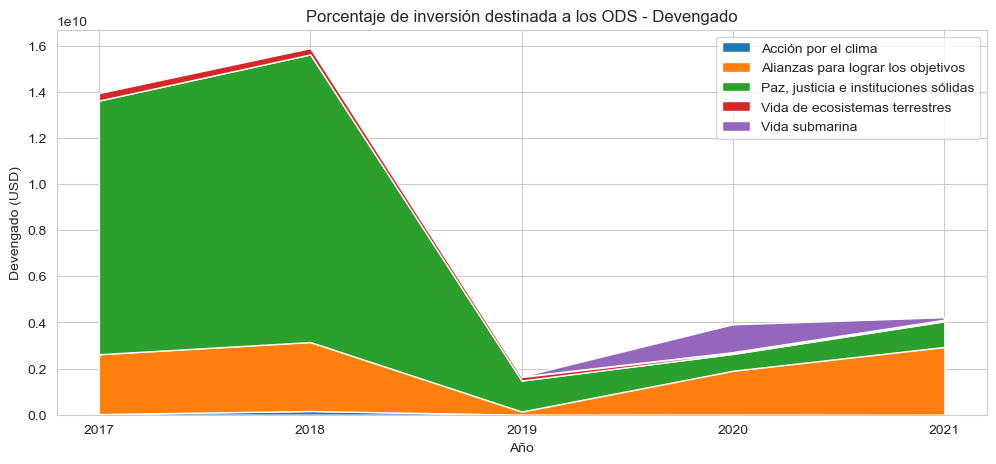

In [34]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = plt.stackplot(data_4b_DEV.Anio, data_4b_DEV['Acción por el clima'], data_4b_DEV['Alianzas para lograr los objetivos'], data_4b_COD['Paz, justicia e instituciones sólidas'], 
                   data_4b_DEV['Vida de ecosistemas terrestres'], data_4b_DEV['Vida submarina'],
                   labels=["Acción por el clima", "Alianzas para lograr los objetivos", "Paz, justicia e instituciones sólidas", 
                    "Vida de ecosistemas terrestres", "Vida submarina"])

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Porcentaje de inversión destinada a los ODS - Devengado')
plt.xlabel('Año')
plt.ylabel('Devengado (USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [35]:
data_4b_COD_T = data_4b_COD.append(data_4b_COD.sum(numeric_only=True), ignore_index=True)
data_4b_DEV_T = data_4b_DEV.append(data_4b_DEV.sum(numeric_only=True), ignore_index=True)


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_42563/791397574.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_4b_COD_T = data_4b_COD.append(data_4b_COD.sum(numeric_only=True), ignore_index=True)
/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_42563/791397574.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_4b_DEV_T = data_4b_DEV.append(data_4b_DEV.sum(numeric_only=True), ignore_index=True)


In [36]:
data_4b_COD_T = data_4b_COD_T.iloc[5: , :]
data_4b_COD_T = data_4b_COD_T.iloc[: , 1:]

data_4b_DEV_T = data_4b_DEV_T.iloc[5: , :]
data_4b_DEV_T = data_4b_DEV_T.iloc[: , 1:]

In [37]:
data_4b_COD_T = data_4b_COD_T.T.reset_index()

In [38]:
data_4b_COD_T.columns = ('ODS', 'Total')

NameError: name 'year' is not defined

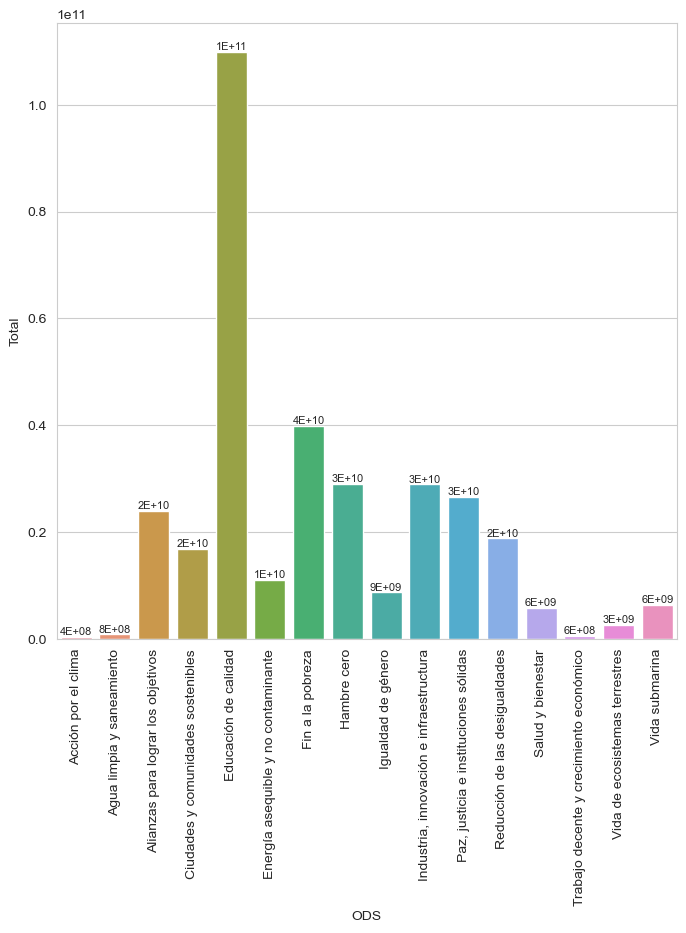

In [39]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")

ax = sns.barplot(x='ODS', y='Total', data=data_4b_COD_T)

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("Inversión Total por ODS - Codificado" % (year))

ax.set_ylabel("Total (USD)", fontsize = 12)
ax.set_xlabel("ODS", fontsize = 12)

# ODS por fuente

In [ ]:
data_4d = data_4.groupby(['Obj', 'Meta', 'BestOpt_Label', 'Fuente', 'Anio']).agg({'Codificado':'sum', 'Devengado':'sum', 'unique_code':'count'}).reset_index()
data_4d = data_4d.loc[data_4d['BestOpt_Label'] != 'N/A']

data_4d_ = data_4d.groupby(['Obj', 'Fuente', 'Anio']).agg({'Codificado':'sum', 'Devengado':'sum', 'unique_code':'sum'}).reset_index()

data_4d_ = pd.merge(data_4d_, ODS_names, how='left', on='Obj')
data_4d_['Fuente'] = data_4d_['Fuente'].str.title()

In [ ]:
data_4d_

In [ ]:
data_4d_1 = data_4d_.loc[data_4d_['Obj'] == "1"]
data_4d_1 = data_4d_1[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_1 = pd.melt(data_4d_1, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_1['value'] = data_4d_1['value']/1000000


data_4d_2 = data_4d_.loc[data_4d_['Obj'] == "2"]
data_4d_2 = data_4d_2[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_2 = pd.melt(data_4d_2, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_2['value'] = data_4d_2['value']/1000000

data_4d_3 = data_4d_.loc[data_4d_['Obj'] == "3"]
data_4d_3 = data_4d_3[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_3 = pd.melt(data_4d_3, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_3['value'] = data_4d_3['value']/1000000

data_4d_4 = data_4d_.loc[data_4d_['Obj'] == "4"]
data_4d_4 = data_4d_4[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_4 = pd.melt(data_4d_4, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_4['value'] = data_4d_4['value']/1000000

data_4d_5 = data_4d_.loc[data_4d_['Obj'] == "5"]
data_4d_5 = data_4d_5[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_5 = pd.melt(data_4d_5, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_5['value'] = data_4d_5['value']/1000000

data_4d_6 = data_4d_.loc[data_4d_['Obj'] == "6"]
data_4d_6 = data_4d_6[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_6 = pd.melt(data_4d_6, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_6['value'] = data_4d_6['value']/1000000

data_4d_7 = data_4d_.loc[data_4d_['Obj'] == "7"]
data_4d_7 = data_4d_7[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_7 = pd.melt(data_4d_7, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_7['value'] = data_4d_7['value']/1000000

data_4d_8 = data_4d_.loc[data_4d_['Obj'] == "8"]
data_4d_8 = data_4d_8[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_8 = pd.melt(data_4d_8, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_8['value'] = data_4d_8['value']/1000000

data_4d_9 = data_4d_.loc[data_4d_['Obj'] == "9"]
data_4d_9 = data_4d_9[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_9 = pd.melt(data_4d_9, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_9['value'] = data_4d_9['value']/1000000

data_4d_10 = data_4d_.loc[data_4d_['Obj'] == "10"]
data_4d_10 = data_4d_10[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_10 = pd.melt(data_4d_10, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_10['value'] = data_4d_10['value']/1000000

data_4d_11 = data_4d_.loc[data_4d_['Obj'] == "11"]
data_4d_11 = data_4d_11[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_11 = pd.melt(data_4d_11, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_11['value'] = data_4d_11['value']/1000000

data_4d_12 = data_4d_.loc[data_4d_['Obj'] == "12"]
data_4d_12 = data_4d_12[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_12 = pd.melt(data_4d_12, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_12['value'] = data_4d_12['value']/1000000

data_4d_13 = data_4d_.loc[data_4d_['Obj'] == "13"]
data_4d_13 = data_4d_13[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_13 = pd.melt(data_4d_13, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=[ 'Devengado'])
data_4d_13['value'] = data_4d_13['value']/1000000

data_4d_14 = data_4d_.loc[data_4d_['Obj'] == "14"]
data_4d_14 = data_4d_14[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_14 = pd.melt(data_4d_14, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_14['value'] = data_4d_14['value']/1000000

data_4d_15 = data_4d_.loc[data_4d_['Obj'] == "15"]
data_4d_15 = data_4d_15[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_15 = pd.melt(data_4d_15, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_15['value'] = data_4d_15['value']/1000000

data_4d_16 = data_4d_.loc[data_4d_['Obj'] == "16"]
data_4d_16 = data_4d_16[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_16 = pd.melt(data_4d_16, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_16['value'] = data_4d_16['value']/1000000

data_4d_17 = data_4d_.loc[data_4d_['Obj'] == "17"]
data_4d_17 = data_4d_17[["Obj", "Fuente", "Anio", "Devengado"]]
data_4d_17 = pd.melt(data_4d_17, id_vars=['Obj', 'Fuente', 'Anio'], value_vars=['Devengado'])
data_4d_17['value'] = data_4d_17['value']/1000000

In [ ]:
data_4d_1_DEV = data_4d_1.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_2_DEV = data_4d_2.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_3_DEV = data_4d_3.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_4_DEV = data_4d_4.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_5_DEV = data_4d_5.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_6_DEV = data_4d_6.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_7_DEV = data_4d_7.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_8_DEV = data_4d_8.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_9_DEV = data_4d_9.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_10_DEV = data_4d_10.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_11_DEV = data_4d_11.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_12_DEV = data_4d_12.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_13_DEV = data_4d_13.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_14_DEV = data_4d_14.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_15_DEV = data_4d_15.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_16_DEV = data_4d_16.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)
data_4d_17_DEV = data_4d_17.pivot_table(values='value', index='Anio', columns='Fuente').fillna(0)

In [ ]:
possible_values = ['  Prestamos Externos', '  Colocaciones Internas', '  Anticipos De Ejercicios Anteriores', 
'  Recursos Provenientes De Preasignaciones', '  Recursos Provenientes De La Ley Organica De Solidaridad',
'  Asistencia Técnica Y Donaciones', '  Colocaciones Externas', '  Recursos Fiscales Generados Por Las Instituciones', 
'  Recursos Fiscales', '  Préstamos Internos']

for val in possible_values:
    if val not in data_4d_1_DEV.columns:
        data_4d_1_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_2_DEV.columns:
        data_4d_2_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_3_DEV.columns:
        data_4d_3_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_4_DEV.columns:
        data_4d_4_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_5_DEV.columns:
        data_4d_5_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_6_DEV.columns:
        data_4d_6_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_7_DEV.columns:
        data_4d_7_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_8_DEV.columns:
        data_4d_8_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_9_DEV.columns:
        data_4d_9_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_10_DEV.columns:
        data_4d_10_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_11_DEV.columns:
        data_4d_11_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_12_DEV.columns:
        data_4d_12_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_13_DEV.columns:
        data_4d_13_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_14_DEV.columns:
        data_4d_14_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_15_DEV.columns:
        data_4d_15_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_16_DEV.columns:
        data_4d_16_DEV[val] = 0

for val in possible_values:
    if val not in data_4d_17_DEV.columns:
        data_4d_17_DEV[val] = 0


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_1_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (1 - Fin de la pobreza)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_2_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (2 - Hambre Cero)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_3_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (3 - Salud y Bienestar)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_4_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (4 - Educación de calidad)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_5_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper left')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (5 - Igualdad de género)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_6_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (6 - Agua limpia y saneamiento)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_7_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (7 - Energía asequible y no contaminante)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_8_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (8 - Trabajo decente y crecimiento económico)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_9_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (9 - Industria, innovación e infraestructura)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_10_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (10 - Reducción de las desigualdades)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_11_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (11 - Ciudades y comunidades sostenibles)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_13_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (13 - Acción por el clima)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_14_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper left')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (14 - Vida submarina)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_15_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (15 - Vida de ecosistemas terrestres)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_16_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (16 - Paz, justicia e instituciones sólidas)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
sns.set_style("whitegrid")

ax = data_4d_17_DEV.plot(kind='area', stacked=False)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.title('Fuentes de financiamiento por ODS (17 - Alianzas para lograr los objetivos)')
plt.xlabel('Año')
plt.ylabel('Devengado (Millones USD)')


plt.xticks(np.arange(2017, 2022, step=1))

#display area chart
plt.show()
